In [1]:
# Step-1: Import Necessary Libraries

import numpy as np
import pandas as pd

In [2]:
# Step-2: Loading the dataset

df = pd.read_csv("retail_sales_dataset.csv")
print(df.head(10), "\n\n")

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

In [3]:
print(df.info(), "\n\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None 




In [4]:
print(df.describe(), "\n\n")   # Gives the description of numerical columns

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000 




In [5]:
# Step-3: Data-Preprocessing

# Handling missing values:
# Checking missing values
print(df.isnull().sum())

# If you get zero missing values, you can proceed with clustering

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [6]:
# Selecting relevant features for clustering

features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
x = df[features]
x

,Age,Quantity,Price per Unit,Total Amount
0,34,3,50,150
1,26,2,500,1000
2,50,1,30,30
3,37,1,500,500
4,30,2,50,100
...,...,...,...,...
995,62,1,50,50
996,52,3,30,90
997,23,4,25,100
998,36,3,50,150


In [7]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [8]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler[:5]

array([[-0.54056476,  0.42926498, -0.68512265, -0.5467043 ],
       [-1.12559156, -0.45399629,  1.68846418,  0.97191876],
       [ 0.62948884, -1.33725757, -0.7906154 , -0.76109815],
       [-0.32117971, -1.33725757,  1.68846418,  0.07861108],
       [-0.83307816, -0.45399629, -0.68512265, -0.63603507]])

In [9]:
# Step-4: Determine the optimal no of clusters
from sklearn.cluster import KMeans

k = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
k.fit(x_scaler)

# WCSS = Within Cluster Sun of Squares: How tightly the data points are clustered around the centroid.
k.inertia_

2413.7255623331757

In [10]:
wcss = []
for i in range(2,12):
    k = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    k.fit(x_scaler)
    wcss.append(k.inertia_)

In [11]:
wcss

[2413.725562333176,
 1919.3355084889329,
 1471.7800268965707,
 1363.2210426652007,
 1051.115873940248,
 929.6545052649502,
 849.1440531776677,
 836.7598485823006,
 657.0692536445782,
 628.8651042590906]

In [12]:
# Example of for loop

a = []
for i in range(1,11):
    print(i)
    a.append(i)
    print(a)

1
[1]
2
[1, 2]
3
[1, 2, 3]
4
[1, 2, 3, 4]
5
[1, 2, 3, 4, 5]
6
[1, 2, 3, 4, 5, 6]
7
[1, 2, 3, 4, 5, 6, 7]
8
[1, 2, 3, 4, 5, 6, 7, 8]
9
[1, 2, 3, 4, 5, 6, 7, 8, 9]
10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


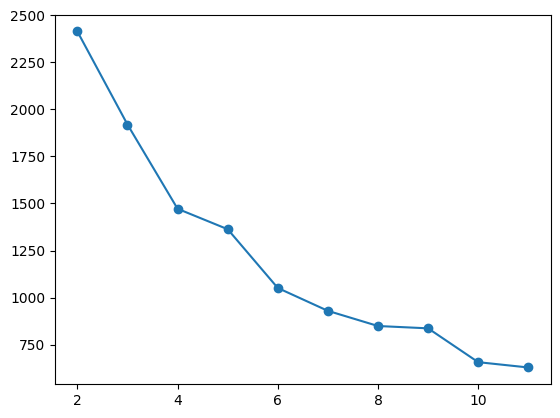

In [14]:
# Step-5: Data Visualization

import matplotlib.pyplot as plt

# Plot Elbow Plot
ep = plt.plot(range(2, 12), wcss, marker = 'o')
ep

In [ ]:
# Step-6: KMeans Clustering

kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
df['Cluster'] = kmeans.fit_predict(x_scaler)
df.head()

C:\Users\hibah\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Cluster
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,1
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,0


In [15]:
# Step-6: Visualizing clusters using PCA
# PCA = Principal Component Analysis
from sklearn.decomposition import PCA

x_scaler = scaler.fit_transform(x)
x_scaler[:5]

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaler)
x_pca[:5]

array([[-0.65708352, -0.84409973],
       [ 1.72575328, -0.33956636],
       [-1.48454179,  0.87659746],
       [ 0.77626109,  0.68859974],
       [-0.95519422, -0.73832597]])

In [ ]:
df['PCA1'] = x_pca[:,0]
df['PCA2'] = x_pca[:,1]


<Axes: xlabel='PCA1', ylabel='PCA2'>

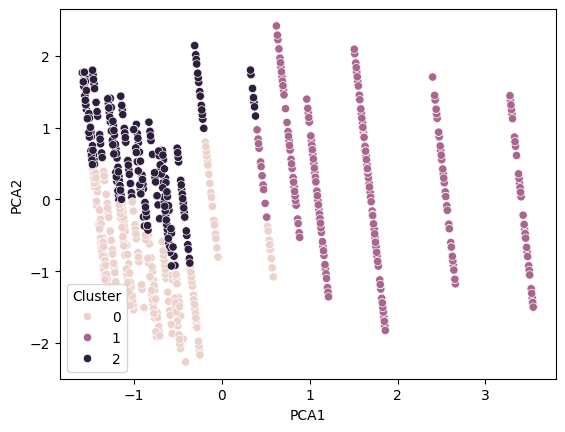

In [ ]:
import seaborn as sns

sns.scatterplot(x = df['PCA1'], y = df['PCA2'], hue = df['Cluster'])